import pandas as pd
import random
from datetime import datetime, timedelta

hashtags = ['challenge', 'dance', 'funny', 'ai', 'booktok', 'fyp', 'fashion', 'sports', 'gaming', 'beauty']
weeks = 8
start_date = datetime(2025, 6, 2)
dates = [start_date + timedelta(weeks=i) for i in range(weeks)]

data = []
for date in dates:
    for tag in hashtags:
        views = random.randint(800_000_000, 3_500_000_000)
        videos = random.randint(150_000, 600_000)
        data.append({
            'date': date.strftime('%Y-%m-%d'),
            'hashtag': tag,
            'views': views,
            'videos': videos
        })

df = pd.DataFrame(data)
df.to_csv("../data/tiktok_trend_mock_data.csv", index=False)
print("✅ Data saved to /data/tiktok_trend_mock_data.csv")


In [1]:
import pandas as pd


df = pd.read_csv("tiktok_trend_mock_data.csv")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("tiktok_trend_mock_data.csv")
df['date'] = pd.to_datetime(df['date'])

print(df.head())
print(df.info())


        date    hashtag       views  videos
0 2025-06-02  challenge  1603009364  154848
1 2025-06-02      dance  1066557900  212135
2 2025-06-02      funny  1148498604  178288
3 2025-06-02         ai   995351315  511970
4 2025-06-02    booktok  3422052694  372026
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     80 non-null     datetime64[ns]
 1   hashtag  80 non-null     object        
 2   views    80 non-null     int64         
 3   videos   80 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.6+ KB
None


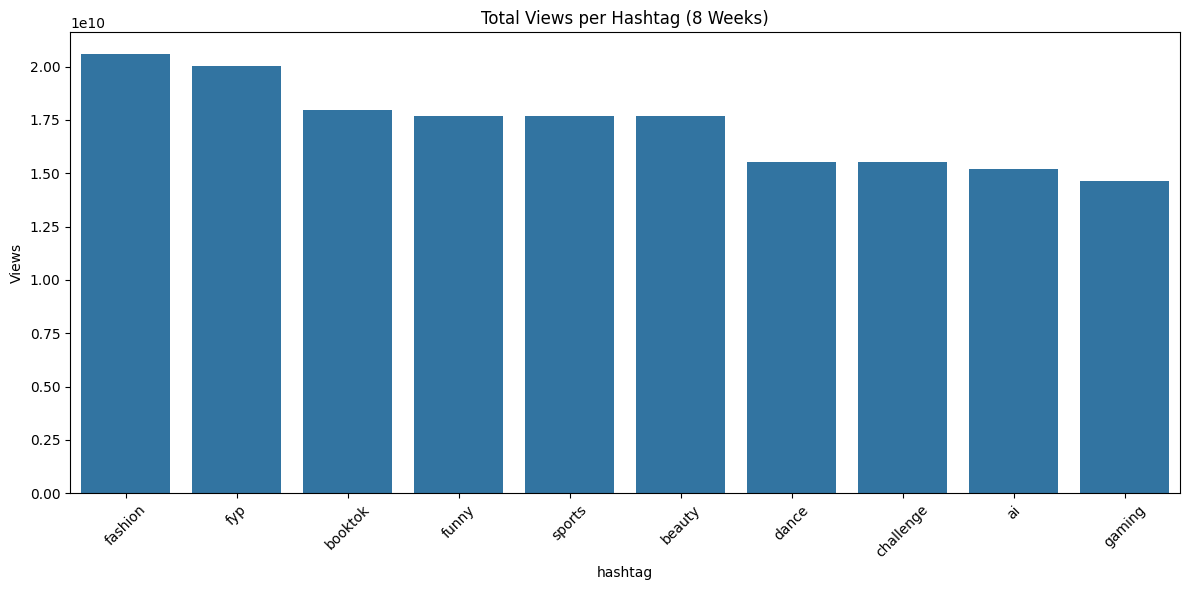

In [3]:
plt.figure(figsize=(12,6))
total_views = df.groupby('hashtag')['views'].sum().sort_values(ascending=False)
sns.barplot(x=total_views.index, y=total_views.values)
plt.title("Total Views per Hashtag (8 Weeks)")
plt.ylabel("Views")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


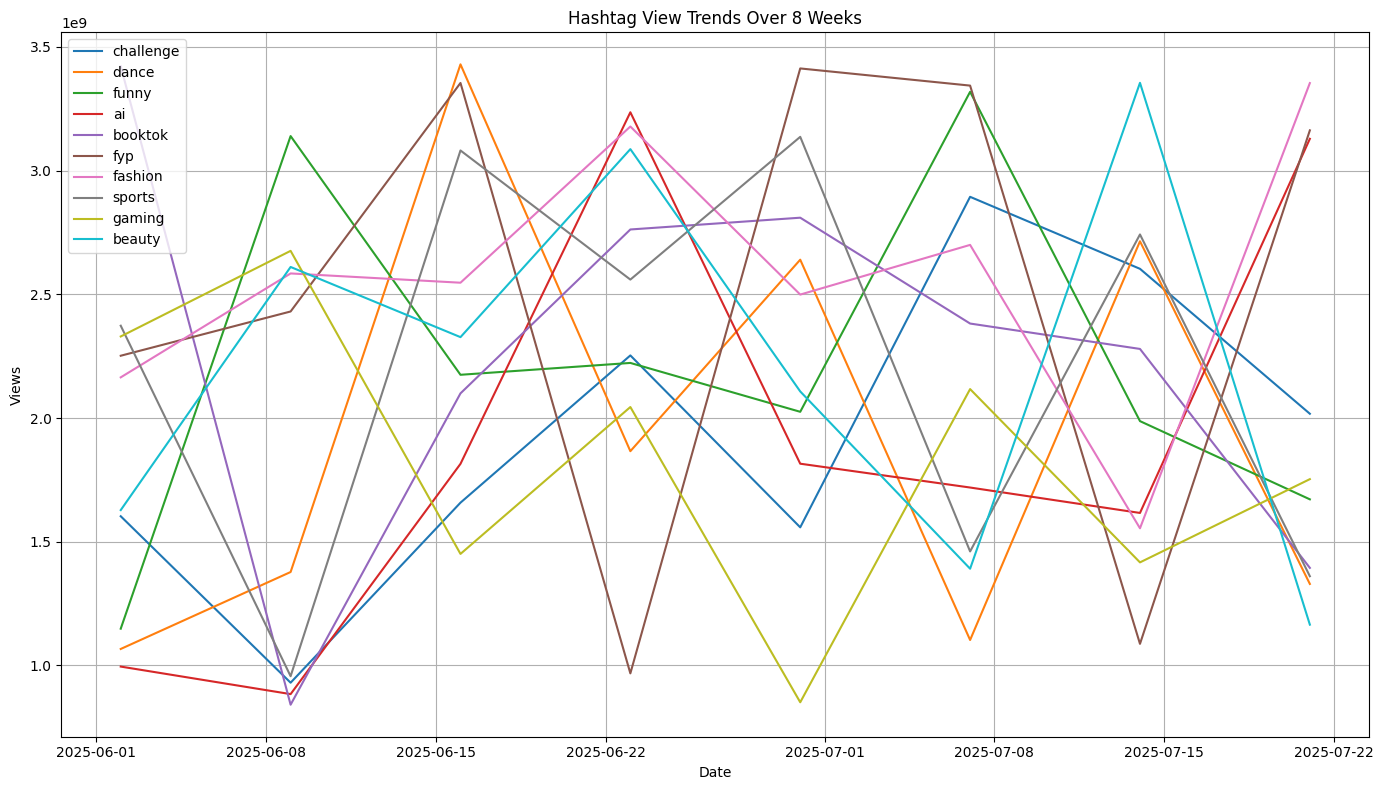

In [4]:
plt.figure(figsize=(14,8))
for tag in df['hashtag'].unique():
    tag_data = df[df['hashtag'] == tag]
    plt.plot(tag_data['date'], tag_data['views'], label=tag)

plt.title("Hashtag View Trends Over 8 Weeks")
plt.xlabel("Date")
plt.ylabel("Views")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
